<a href="https://colab.research.google.com/github/bjpark-forest/2023-1-Intro-DataScience/blob/main/10%E1%84%8C%E1%85%AE%E1%84%8E%E1%85%A1_2023431213_%E1%84%87%E1%85%A1%E1%86%A8%E1%84%87%E1%85%A9%E1%86%BC%E1%84%8C%E1%85%AE%E1%84%80%E1%85%AA%E1%84%8C%E1%85%A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6장

###문제1
- tvN 방영드라마를 검색한 후 상위 5행 출력하는 빈칸 코드를 완성

In [3]:
import pandas as pd
kdrama = pd.read_csv('top100_kdrama.csv')

tvN = kdrama['Network'].str.contains('tvN') # tvN을 포함한 조건이 참이 되는 경우
kdrama[tvN].head(5)[['Name', 'Network']]

,Name,Network
1,Hospital Playlist,"Netflix, tvN"
2,Flower of Evil,tvN
3,Hospital Playlist 2,"Netflix, tvN"
4,My Mister,tvN
5,Prison Playbook,"Netflix, tvN"


###문제2
- 드라마 평가 점수의 최대와 최소값 구하고, 가장 높은 점수의 드라마 이름과 평가 점수 출력하는 빈칸 코드를 완성

In [4]:
kdrama['Rating'].max(), kdrama['Rating'].min() 

(9.2, 8.5)

In [5]:
d = kdrama['Rating'] == kdrama['Rating'].max()
kdrama[d][['Name','Rating']]

,Name,Rating
0,Move to Heaven,9.2


###문제3-1
- 드라마에 참여한 작품이 많은 배우들 출력하는 코드

In [6]:
from collections import Counter

cast_list = list()

for casts in kdrama['Cast'].to_list():
    casts = casts.split(', ')
    for a in casts:
        cast_list.append(a)
        
cast_df = pd.DataFrame.from_dict(Counter(cast_list),orient = 'index').rename(columns = {0:'Appearance'})
cast_df.sort_values(by='Appearance',ascending = False,inplace = True)
cast_df.head()

,Appearance
Lee Joon Hyuk,6
Jung Kyung Ho,5
Kim Ji Won,5
Song Joong Ki,5
Ji Sung,4


###문제3-2
- 3-1 코드를 이용하여 배우별 드라마 수 TOP5 막대그래프 출력하는 빈칸 코드를 완성

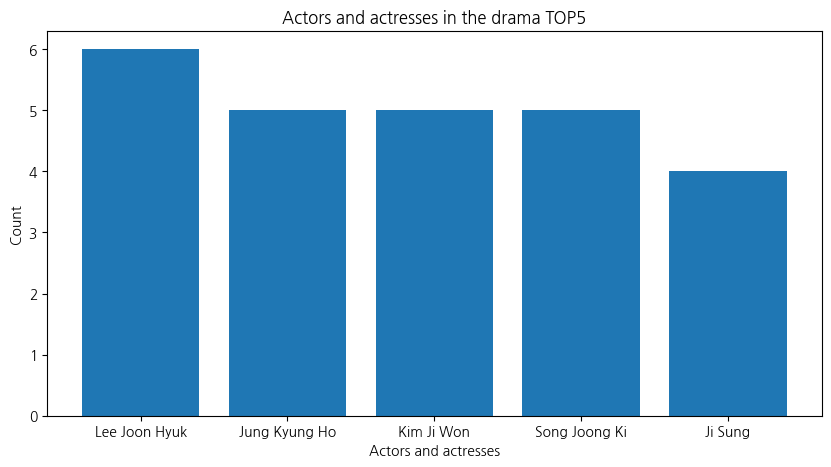

In [7]:
import matplotlib.pyplot as plt

top5_df = cast_df.head()
plt.figure(figsize=(10,5))
plt.bar(top5_df.index, top5_df.Appearance)
plt.title('Actors and actresses in the drama TOP5')
plt.xlabel("Actors and actresses")
plt.ylabel("Count")
plt.show()

In [8]:
# 맷플롯 한글 폰트 깨짐 현상에 대한 해결 방법
# 1) 한글 폰트 설치
# 2) 설치 후 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [9]:
# 3) 한글 폰트 읽어오기 (코랩용)

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()

plt.rc('font', family=font_name)

###문제4-1
- 대한민국 영상물 등급 제도(Content Rating)별 드라마 빈도수 출력 후, 선 그래프로 시각화하는 빈칸 코드를 완성

In [10]:
rating = kdrama["Content Rating"].value_counts()
rating

15+ - Teens 15 or older                   88
18+ Restricted (violence & profanity)     10
13+ - Teens 13 or older                    2
Name: Content Rating, dtype: int64

###문제4-2
- 4-1 코드를 이용하여 등급별 드라마 수 TOP5 선그래프와 막대그래프 출력하는 빈칸 코드를 완성

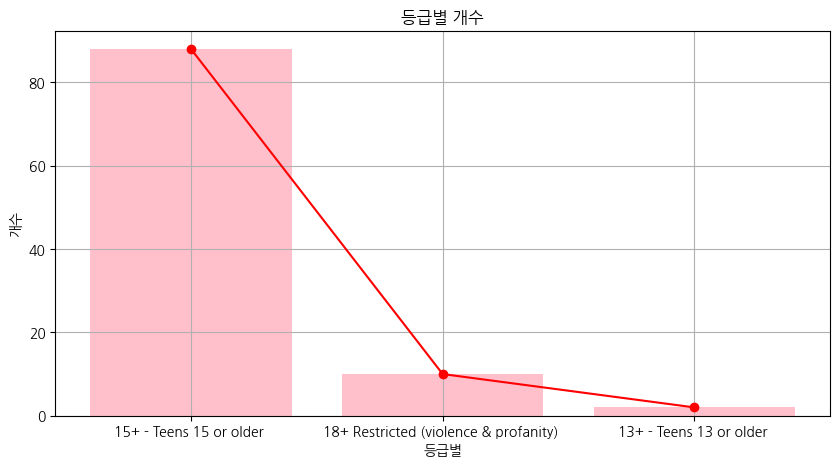

In [11]:
plt.figure(figsize=(10,5))
plt.bar(rating.index, rating.values, color='pink')
plt.plot(rating.index, rating.values, color='r', marker='o')
plt.xlabel('등급별')
plt.ylabel('개수')
plt.title('등급별 개수')
plt.grid()
plt.show()